# 1. Install and Import Dependencies

In [1]:
!pip install torch

In [2]:
!pip install torchvision

In [3]:
!pip install torchaudio

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
from PIL import Image
import time
import json
import logging
import sys

In [6]:
import uuid   # Unique identifier
import os
import time

In [7]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# 2. Load Model

In [4]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:
!cd yolov5 & pip install -r requirements.txt

# 3.Load Data

In [8]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['happy', 'sad', 'angry', 'suprise']
number_imgs = 30

In [9]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [10]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\happy.8ab80168-e76d-11ed-9565-088fc31687ce.jpg


In [11]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\happy.8b5fa493-e76d-11ed-aefd-088fc31687ce.jpg
data\images\happy.8b5fa494-e76d-11ed-98e9-088fc31687ce.jpg
data\images\happy.8b5fa495-e76d-11ed-b3fd-088fc31687ce.jpg
data\images\happy.8b5fa496-e76d-11ed-bec0-088fc31687ce.jpg
data\images\happy.8b5fa497-e76d-11ed-89b4-088fc31687ce.jpg
data\images\happy.8b5fa498-e76d-11ed-8631-088fc31687ce.jpg
data\images\happy.8b5fa499-e76d-11ed-8269-088fc31687ce.jpg
data\images\happy.8b5fa49a-e76d-11ed-a4de-088fc31687ce.jpg
data\images\happy.8b5fa49b-e76d-11ed-9cce-088fc31687ce.jpg
data\images\happy.8b5fa49c-e76d-11ed-b290-088fc31687ce.jpg
data\images\happy.8b5fa49d-e76d-11ed-aaa8-088fc31687ce.jpg
data\images\happy.8b5fa49e-e76d-11ed-8030-088fc31687ce.jpg
data\images\happy.8b5fa49f-e76d-11ed-9b17-088fc31687ce.jpg
data\images\happy.8b5fa4a0-e76d-11ed-a9e0-088fc31687ce.jpg
data\images\happy.8b5fa4a1-e76d-11ed-a784-088fc31687ce.jpg
data\images\happy.8b5fa4a2-e76d-11ed-860c-088fc31687ce.jpg
data\images\happy.8b5fa4a3-e76d-11ed-a154-088fc31687ce.j

In [12]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [12]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

# 4.Train Model

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 100 --data dataset.yaml --weights yolov5s.pt --workers 2

# 5.Load Custom Model

In [11]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp6/weights/last.pt', force_reload=True)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [36]:
history=model

In [37]:
history.hitory??

Object `history.hitory` not found.


In [32]:
img = os.path.join('data', 'images', 'angry.b2f46bb3-e76c-11ed-8b8d-088fc31687ce.jpg')

In [33]:
results = model(img)

In [34]:
results.print()

image 1/1: 480x640 1 angry
Speed: 15.0ms pre-process, 104.7ms inference, 13.5ms NMS per image at shape (1, 3, 480, 640)


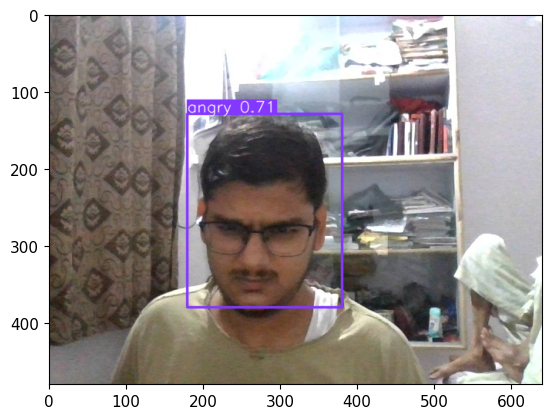

In [35]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [15]:
cap = cv2.VideoCapture('Sample.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'